####  <center>Assignment 4</center> 

Name : Sulabh Jha

PRN  : 230940128031 

Q.1 Open the wikipedia page https://en.wikipedia.org/wiki/Saturn

- 1. Scrap the web and find top 10 nouns from the page

- 2. Print all the unique verbs in their root form.

- 3. Extract all the &lt;DT&gt;&lt;JJ&gt;&lt;NN&gt; phrases from the article.

- 4. Summarize the text using TextRank Algorithm

- 5. Summarize the text using extractive summarization


In [54]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk import RegexpParser
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import urllib
from bs4 import BeautifulSoup
from nltk import FreqDist
import matplotlib.pyplot as plt
from nltk import RegexpParser
from sumy.summarizers.text_rank import TextRankSummarizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer

#### 1. Scrap the web and find top 10 nouns from the page

In [47]:
url = urllib.request.urlopen('https://en.wikipedia.org/wiki/Saturn')
data = url.read()

soup = BeautifulSoup(data, 'html.parser')
text = soup.find_all('p')

sent = []
for tag in text:
    sent.append(tag.text.strip())
sent = " ".join(sent)
sent

' Saturn is the sixth planet from the Sun and the second-largest in the Solar System, after Jupiter. It is a gas giant with an average radius of about nine-and-a-half times that of Earth.[26][27] It has only one-eighth the average density of Earth, but is over 95 times more massive.[28][29][30] Saturn\'s interior is thought to be composed of a rocky core, surrounded by a deep layer of metallic hydrogen, an intermediate layer of liquid hydrogen and liquid helium, and finally, a gaseous outer layer. Saturn has a pale yellow hue due to ammonia crystals in its upper atmosphere. An electrical current within the metallic hydrogen layer is thought to give rise to Saturn\'s planetary magnetic field, which is weaker than Earth\'s, but which has a magnetic moment 580 times that of Earth due to Saturn\'s larger size. Saturn\'s magnetic field strength is around one-twentieth of Jupiter\'s.[31] The outer atmosphere is generally bland and lacking in contrast, although long-lived features can appear.

In [48]:
tags = pos_tag(word_tokenize(sent))

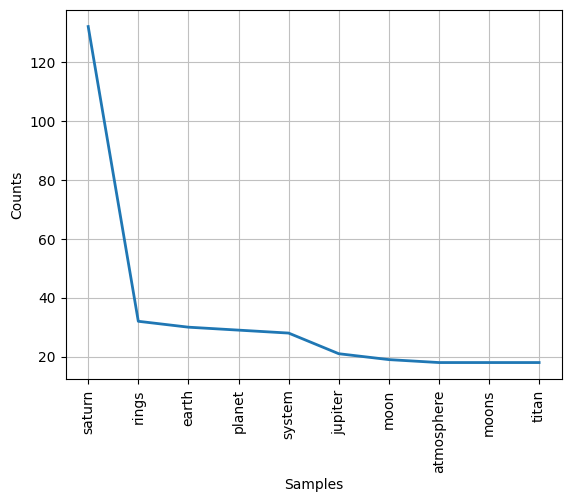

[('saturn', 132),
 ('rings', 32),
 ('earth', 30),
 ('planet', 29),
 ('system', 28),
 ('jupiter', 21),
 ('moon', 19),
 ('atmosphere', 18),
 ('moons', 18),
 ('titan', 18)]

In [49]:
noun = []
for i in tags:
    if i[1].startswith('N') and i[0].isalpha() :
        noun.append(i[0].lower())
noun = " ".join(noun)
freq = FreqDist(word_tokenize(noun))
freq.plot(10, cumulative=False)
freq.most_common(10)

#### 2. Print all the unique verbs in their root form.

In [50]:
tokens = word_tokenize(sent)
swords = stopwords.words('english')

wnl = WordNetLemmatizer()

tokens1 = [x for x in tokens if x.isalpha()]

tags = pos_tag(tokens1)
verbs = set()
for t in tags:
    if t[1].startswith('V') :
      verbs.add(t)

tokens3 = []
for word, _ in verbs:
    if word not in swords:
        tokens3.append(wnl.lemmatize(word.lower(), pos = 'v'))
print(tokens3)

['put', 'saw', 'extend', 'look', 'assume', 'track', 'show', 'deplete', 'comprise', 'appear', 'ammonia', 'achieve', 'mi', 'condense', 'detect', 'extend', 'descend', 'yield', 'reach', 'occur', 'emit', 'come', 'next', 'name', 'charge', 'believe', 'classify', 'make', 'send', 'visit', 'particles', 'reservoirs', 'include', 'make', 'geyser', 'change', 'flatten', 'occur', 'remain', 'come', 'use', 'give', 'prove', 'persist', 'acquire', 'show', 'consist', 'uranus', 'indicate', 'cause', 'prevent', 'display', 'consist', 'erupt', 'shape', 'associate', 'find', 'require', 'depend', 'see', 'discover', 'call', 'tilt', 'continue', 'leave', 'expel', 'place', 'form', 'become', 'suggest', 'orbit', 'publish', 'record', 'vary', 'estimate', 'correspond', 'include', 'hypothesize', 'perform', 'indicate', 'think', 'require', 'think', 'designate', 'produce', 'take', 'result', 'unique', 'continue', 'assign', 'direct', 'lack', 'titan', 'improve', 'round', 'confirm', 'compare', 'pressure', 'supersede', 'appear', 'mo

#### 3. Extract all the &lt;DT&gt;&lt;JJ&gt;&lt;NN&gt; phrases from the article.

In [51]:
chunker = RegexpParser("""
NP: {<DT><JJ><NN>}
""")
result = chunker.parse(tags)
result

#### 4. Summarize the text using TextRank Algorithm

In [52]:
my_parser = PlaintextParser.from_string(sent, Tokenizer('english'))
tex_rank_summarizer = TextRankSummarizer()
summary = tex_rank_summarizer(my_parser.document, sentences_count = 3)

In [53]:
for sent in summary:
    print(sent)

The combination of the bulge and rotation rate means that the effective surface gravity along the equator, 8.96 m/s2, is 74% of what it is at the poles and is lower than the surface gravity of Earth.
Water ice clouds begin at a level where the pressure is about 2.5 bar and extend down to 9.5 bar, where temperatures range from 185 to 270 K. Intermixed in this layer is a band of ammonium hydrosulfide ice, lying in the pressure range 3–6 bar with temperatures of 190–235 K. Finally, the lower layers, where pressures are between 10 and 20 bar and temperatures are 270–330 K, contains a region of water droplets with ammonia in aqueous solution.
The Moon's orbit is inclined by several degrees relative to Saturn's, so occultations will only occur when Saturn is near one of the points in the sky where the two planes intersect (both the length of Saturn's year and the 18.6-Earth year nodal precession period of the Moon's orbit influence the periodicity).


#### 5. Summarize the text using extractive summarization

In [59]:
url = urllib.request.urlopen('https://en.wikipedia.org/wiki/Saturn')
data = url.read()

soup = BeautifulSoup(data, 'html.parser')
text = soup.find_all('p')

sent = []
for tag in text:
    sent.append(tag.text.strip())
sent = " ".join(sent)
sent

' Saturn is the sixth planet from the Sun and the second-largest in the Solar System, after Jupiter. It is a gas giant with an average radius of about nine-and-a-half times that of Earth.[26][27] It has only one-eighth the average density of Earth, but is over 95 times more massive.[28][29][30] Saturn\'s interior is thought to be composed of a rocky core, surrounded by a deep layer of metallic hydrogen, an intermediate layer of liquid hydrogen and liquid helium, and finally, a gaseous outer layer. Saturn has a pale yellow hue due to ammonia crystals in its upper atmosphere. An electrical current within the metallic hydrogen layer is thought to give rise to Saturn\'s planetary magnetic field, which is weaker than Earth\'s, but which has a magnetic moment 580 times that of Earth due to Saturn\'s larger size. Saturn\'s magnetic field strength is around one-twentieth of Jupiter\'s.[31] The outer atmosphere is generally bland and lacking in contrast, although long-lived features can appear.

In [60]:
my_parser = PlaintextParser.from_string(sent, Tokenizer('english'))
lsa_summarizer = LsaSummarizer()
summary = lsa_summarizer(my_parser.document, sentences_count = 3)
for sent in summary:
    print(sent)

[47][48][49] Saturn has a hot interior, reaching 11,700 °C at its core, and radiates 2.5 times more energy into space than it receives from the Sun.
[111] Saturn's moon Enceladus, which seems similar in chemical makeup to comets,[112] has often been regarded as a potential habitat for microbial life.
[157] In 1899 William Henry Pickering discovered Phoebe, a highly irregular satellite that does not rotate synchronously with Saturn as the larger moons do.
